# Tutorial for `Group library`
This folder contains an extension of the [absalg](https://github.com/naftaliharris/Abstract-Algebra) library by [Naftali Harris](http://www.naftaliharris.com).

We start by loading the library

In [1]:
%pylab inline 
from Set import Set

Populating the interactive namespace from numpy and matplotlib


In [2]:
A = Set({1,2,3})
B = Set({2,4})

In [3]:
C = A*B
C

{(2, 4), (1, 2), (3, 4), (2, 2), (3, 2), (1, 4)}

In [4]:
C.is_finite(), C.cardinality()

(True, 6)

In [5]:
A.subsets()

[{1}, {2}, {3}, {1, 2}, {1, 3}, {2, 3}, {1, 2, 3}]

In [6]:
A.subsets(2)

[{1, 2}, {1, 3}, {2, 3}]

In [7]:
from Function import Function

In [8]:
S = Set({0,1,2})
F=Function(S*S, S,lambda x: (x[0]+x[1])%3)
print(F)

f((0, 1))=1
 f((1, 2))=0
 f((2, 1))=0
 f((0, 0))=0
 f((1, 1))=2
 f((2, 0))=2
 f((0, 2))=2
 f((2, 2))=1
 f((1, 0))=1



## Defining a group
Let us define a group from scratch. We need a set and a binary operation.

In [9]:
from Group import *

In [10]:
S=Set(range(5))
b_op=Function(S.cartesian(S),S,lambda x: (x[0]+x[1])%5)
G=Group(S,b_op)

In [11]:
CyclicGroup?

We can, for instance, list the elements in `G`. Observe that this is just a representation of them.

In [12]:
list(G)

[0, 1, 2, 3, 4]

This does not mean that 1 is in `G`.

In [13]:
1 in G

False

However 1 is in the underlying set of `G`

In [14]:
1 in G.Set

True

In order to see 1 in `G`, we need to create an instance of it as element in `G`. And then, we can operate with it.

In [15]:
one=G(1)
one*one

2

As in this case, `G` is abelian, we can even perform the last operation by using `+`.

In [16]:
one+one

2

Also, in this case powers become multiples.

In [17]:
one**3==3*one

True

The Cayley table of `G` can be calculated as follows (multiplicative table).

In [18]:
G.table()

*,0,1,2,3,4
0,0,1,2,3,4
1,1,2,3,4,0
2,2,3,4,0,1
3,3,4,0,1,2
4,4,0,1,2,3


In [19]:
Set([i*one for i in range(10)])

{0, 1, 2, 3, 4}

We can indeed do this last operation by considering the group spanned by `one`; which in this case is `G` itself.

In [20]:
H=G.generate([one])
H==G

True

In [21]:
H==G.generate([1])

True

This means that this group is *cyclic*.

In [22]:
G.is_cyclic()

True

We can also define a subgroup by its elements. The procedure will raise an error if the set is not a subgroup of the given group

In [23]:
G1=CyclicGroup(6)
H=G1.subgroup_by_elms([0,3])

In [24]:
3 in H.Set

True

In [25]:
H(3) in G1

True

The inverse of an element can be compute in several ways. 

In [26]:
[G.inverse(one), one**-1]

[4, 4]

We can compute the lattice of subgroups of `G`. The output is a dictionary: `n:set of subgroups of order n`.

In [27]:
subgs=G.subgroups()

In [28]:
subgs

{5: {Group( [0, 1, 2, 3, 4] )}, 1: {Group( [0] )}}

Alternatively, we can compute a list with all subgroups with given order.

In [29]:
G.subgroups(5)

Group( [0, 1, 2, 3, 4] )

In particular this implies that `G` is a simple group.

In [30]:
G.is_simple()

True

However, `G1` is not simple, since it has nontrivial subgroups

In [31]:
G1.is_simple()

False

We can print the elements in the subgroups of `G`

In [32]:
for keys,values in subgs.items():
    print(values)


{Group( [0, 1, 2, 3, 4] )}
{Group( [0] )}


Since `G` is abelian, all its subgroups are normal.

In [33]:
G.normal_subgroups()

{5: {Group( [0, 1, 2, 3, 4] )}, 1: {Group( [0] )}}

Indeed groups as `G` are quite common, this is why we dedided to write an specific function to define them: `CyclicGroup`. We will talk later more about it. 

The function `CyclicGroup(n)` returns (as defaul) the group $(\mathbb{Z}_n,+)$.

In [34]:
G.is_isomorphic(CyclicGroup(5))

True

## Cartesian product and quotients
A way to obtain groups from others is by computing cartesian products, or quotients by normal subgroups.

Let us, for instance, compute `G^2`

In [35]:
G2=G.cartesian(G)

The elements of `G2` are tuples. We can as above, instanciate one of its elements.

In [36]:
one2=G2((1,1))

We can define the cyclic group generated by `one2`, and check that indeed is a subgroup of `G2`.

In [37]:
H=G2.generate([one2])
H<=G2

True

Contrary to what happened above, in this case `H` is not `G2` itself; this is due to the fact that `G2` is no longer cyclic. Let us compute a system of generators of `G2`.

In [38]:
H==G2

False

In [39]:
G2.is_cyclic()

False

In [40]:
G2.generators()

[(0, 1), (1, 0)]

We already know that every subgroup of an abelian group is normal, and so we can compute the quotient of `G2` by `H`.

In [41]:
G2/H

Group with 5 elements

Its elements are congruency classes, and this is why when listing them, we get a lists of sets.

In [42]:
Q=G2/H
list(Q)

[{(4, 4), (3, 3), (2, 2), (0, 0), (1, 1)},
 {(0, 1), (2, 3), (1, 2), (4, 0), (3, 4)},
 {(1, 3), (2, 4), (0, 2), (4, 1), (3, 0)},
 {(4, 2), (3, 1), (0, 3), (2, 0), (1, 4)},
 {(0, 4), (2, 1), (4, 3), (1, 0), (3, 2)}]

In [43]:
Q.is_abelian()

True

In [44]:
Q.is_cyclic()

True

In [45]:
#sbgrps=G2.subgroups()
#[[list(J) for J in sbgrps[j]] for j in sbgrps.keys()]
#for j in sbgrps.keys():
#    print(str(j)+"->"+str([list(J) for J in sbgrps[j]]))

## Group homomorphisms

In order to define a group homomorphism, we have to provide the domain, codomain and a function that fulfills that is a group morphism

In [46]:
G=CyclicGroup(3)
H=G.cartesian(G)
f=GroupHomomorphism(H,G, lambda x:G(x.elem[1]))

We can compute the kernel, or check wether or not it is injective, surjective or and isomorphism

In [47]:
f.kernel()

Group( [(1, 0), (2, 0), (0, 0)] )

In [48]:
f.is_bijective()

False

In [49]:
f.is_surjective()

True

In [50]:
G=CyclicGroup(6)
f=GroupHomomorphism(G,G, lambda x:2*x)

In [51]:
f.is_injective()

False

In [52]:
list(f.kernel())

[0, 3]

In [53]:
f.function(G(1))

2

Also we can compute this as follows.

In [54]:
f(G(2))

4

For compute a list of all the homomorphisms between two groups:

In [55]:
G=CyclicGroup(18)
H=CyclicGroup(30)
Hom=G.AllHomomorphisms(H)
Hom

[Group homomorphism,
 Group homomorphism,
 Group homomorphism,
 Group homomorphism,
 Group homomorphism,
 Group homomorphism]

Also we can compute the group of automorphisms of a group

In [56]:
G=CyclicGroup(5)
Aut=G.AutomorphismGroup()
Aut

Group( [Group endomorphism, Group endomorphism, Group endomorphism, Group endomorphism] )

In [57]:
Aut.table('letters')

*,e,a,b,c
e,e,a,b,c
a,a,b,c,e
b,b,c,e,a
c,c,e,a,b


In [58]:
Aut.is_isomorphic(GroupOfUnitsModInt(5))

True

In [59]:
B=CyclicGroup(2)
A=CyclicGroup(5)
AutA=A.AutomorphismGroup()
Hom=B.AllHomomorphisms(AutA)
Hom

[Group homomorphism, Group homomorphism]

Each homomorphism will give a semidirect product

In [60]:
hom0=GroupHomomorphism(B,AutA,lambda x:Hom[1](x),check_morphism_axioms=True)

In [61]:
SP0=A.semidirect_product(B,hom0)

In [62]:
SP0.table()

*,"(0, 0)","(0, 1)","(4, 0)","(2, 1)","(3, 1)","(1, 1)","(2, 0)","(3, 0)","(1, 0)","(4, 1)"
"(0, 0)","(0, 0)","(0, 1)","(4, 0)","(2, 1)","(3, 1)","(1, 1)","(2, 0)","(3, 0)","(1, 0)","(4, 1)"
"(0, 1)","(0, 1)","(0, 0)","(1, 1)","(3, 0)","(2, 0)","(4, 0)","(3, 1)","(2, 1)","(4, 1)","(1, 0)"
"(4, 0)","(4, 0)","(4, 1)","(3, 0)","(1, 1)","(2, 1)","(0, 1)","(1, 0)","(2, 0)","(0, 0)","(3, 1)"
"(2, 1)","(2, 1)","(2, 0)","(3, 1)","(0, 0)","(4, 0)","(1, 0)","(0, 1)","(4, 1)","(1, 1)","(3, 0)"
"(3, 1)","(3, 1)","(3, 0)","(4, 1)","(1, 0)","(0, 0)","(2, 0)","(1, 1)","(0, 1)","(2, 1)","(4, 0)"
"(1, 1)","(1, 1)","(1, 0)","(2, 1)","(4, 0)","(3, 0)","(0, 0)","(4, 1)","(3, 1)","(0, 1)","(2, 0)"
"(2, 0)","(2, 0)","(2, 1)","(1, 0)","(4, 1)","(0, 1)","(3, 1)","(4, 0)","(0, 0)","(3, 0)","(1, 1)"
"(3, 0)","(3, 0)","(3, 1)","(2, 0)","(0, 1)","(1, 1)","(4, 1)","(0, 0)","(1, 0)","(4, 0)","(2, 1)"
"(1, 0)","(1, 0)","(1, 1)","(0, 0)","(3, 1)","(4, 1)","(2, 1)","(3, 0)","(4, 0)","(2, 0)","(0, 1)"
"(4, 1)","(4, 1)","(4, 0)","(0, 1)","(2, 0)","(1, 0)","(3, 0)","(2, 1)","(1, 1)","(3, 1)","(0, 0)"


In [63]:
SP0.is_isomorphic(DihedralGroup(5))

True

In [64]:
hom1=GroupHomomorphism(B,AutA,lambda x:Hom[1](x),check_morphism_axioms=True)
SP1=A.semidirect_product(B,hom1)

In [65]:
CyclicGroup(5).cartesian(CyclicGroup(2)).is_isomorphic(SP0)

False

## Groups of matrices

We may compute GL(2,p) and SL(2,p) for p prime.

In [66]:
GL2(2).table('letters')

*,e,a,b,c,d,f
e,e,a,b,c,d,f
a,a,e,f,d,c,b
b,b,c,d,f,e,a
c,c,b,a,e,f,d
d,d,f,e,a,b,c
f,f,d,c,b,a,e


In [67]:
SL2(3)

Group with 24 elements

## Permutations

Permutations are a fundamental tool for the study of groups. Indeed permutations (bijective maps) of the set $\{1,\ldots,n\}$ under composition are a group that is not abelian for $n\ge 3$.

We have included a bunch of ways to define a permuation with the class `permutation`.

- `permutation(list of integers)` creates a permutation in which the $i$ goes to the $i$th elmeent in the given list of integers.

- `permutation(sequence of integers)` does the same as above, by considering the sequence as a list.

- `permutation(sequence of tuples)` creates a permutation that is the product of the given tuples, by considering the tuples as cycles.

- `permutation(list of tuples)` does the same as in the preceding case.


In [68]:
permutation(2,3,1,4)==permutation([2,3,1,4])

True

In [69]:
permutation((1,2),(3,4))==permutation([(1,2),(3,4)])

True

Composition of permutations is performed by using the `*` operator; powers with `**`.

In [70]:
p=permutation((1,2),(3,4))
p*p

()

You may gues from the above output that we are displaying the identity map just by `( )`. Permutations are displayed as a product of disjoint cycles, and printed both in matrix representation and as a product of disjoint cycles.

In [71]:
p

(1, 2)(3, 4)

In [72]:
print(p)

(1, 2)(3, 4)


In [73]:
p**-1==p

True

The order of a permutation is computed as follows.

In [74]:
p.order()

2

Also we can compute its sign, inversions and decomposition into disjoint cycles.

In [75]:
p.sign()

1

In [76]:
p.inversions()

[(1, 2), (3, 4)]

In [77]:
p.disjoint_cycles()

[(1, 2), (3, 4)]

In [78]:
p.odd_permutation(), p.even_permutation()

(False, True)

## Groups of permutations

As we mentioned above, permutations of $\{1,\ldots, n\}$ with composition as binary operation are a group, which is known as the symmetric group and it is denoted by $S_n$. We have a function to created groups of permutations.

In [79]:
S3=SymmetricGroup(3)
list(S3)

[(), (2, 3), (1, 2), (1, 3), (1, 3, 2), (1, 2, 3)]

In [80]:
p=S3(permutation(3,2,1))
q=S3(permutation(2,1,3))

In [81]:
H=S3.generate([p,q])

In [82]:
H.group_elems

{(1, 3), (2, 3), (1, 3, 2), (1, 2, 3), (), (1, 2)}

An important subgroup of the symmetric group $S_n$ is the group of all even (sign=1) permutations, which is known as the alternating group and denoted by $A_n$. It is well known that $A_n$ is a normal subgroup of $S_n$.

In [83]:
A3=AlternatingGroup(3)
list(S3/A3)

[{(1, 2, 3), (), (1, 3, 2)}, {(1, 3), (2, 3), (1, 2)}]

And in this way we are listing odd and even permutations in separate sets.

The symmetric group $S_n$ has always a "copy" of `CyclicGroup(n)`, which is the subgroup of $S_n$ spanned by the cycle $(1\ldots n)$. We can construct it as follows. 

In [84]:
C3=CyclicGroup(3,"permutations")
list(C3)

[(), (1, 2, 3), (1, 3, 2)]

In [85]:
Z3=CyclicGroup(3)
list(C3)

[(), (1, 2, 3), (1, 3, 2)]

In [86]:
C3.is_isomorphic(Z3)

True

Another important subgroup of the $S_n$ is the dihedral group of movements that leave invariant an $n$-gon centered in the origin. This group can be represented either by permutations or by symmetries and rotations.

In [87]:
D4=DihedralGroup(4)
D4.table()

*,'R0','S2','R2','R1','R3','S1','S0','S3'
'R0','R0','S2','R2','R1','R3','S1','S0','S3'
'S2','S2','R0','S0','S1','S3','R1','R2','R3'
'R2','R2','S0','R0','R3','R1','S3','S2','S1'
'R1','R1','S3','R3','R2','R0','S2','S1','S0'
'R3','R3','S1','R1','R0','R2','S0','S3','S2'
'S1','S1','R3','S3','S0','S2','R0','R1','R2'
'S0','S0','R2','S2','S3','S1','R3','R0','R1'
'S3','S3','R1','S1','S2','S0','R2','R3','R0'


## Product and intersection of subgroups
Product and intersection of subgroups of a group $G$ are again subgroups of $G$

In [88]:
Dp4=DihedralGroup(4,"permutations")
list(Dp4)

[(),
 (1, 2, 3, 4),
 (1, 2)(3, 4),
 (1, 4, 3, 2),
 (1, 4)(2, 3),
 (2, 4),
 (1, 3),
 (1, 3)(2, 4)]

In [89]:
A4=AlternatingGroup(4)
A4*Dp4

Group( [(1, 3, 2, 4), (1, 3, 4, 2), (3, 4), (1, 2, 4, 3)] )

In [90]:
list(A4.intersection(Dp4))

[(), (1, 2)(3, 4), (1, 4)(2, 3), (1, 3)(2, 4)]

We can for instance, illustrate the third isometry theorem: $KN/N\cong K/(K\cap N)$.

In [91]:
Q1=(A4*Dp4)/A4
Q2=Dp4/(A4.intersection(Dp4))
Q1.is_isomorphic(Q2)

True

We can define also $Q_2$ by means of permutations

In [92]:
PQ2=QuaternionGroup("permutations")

In [93]:
PQ2.group_elems

{(1, 4, 3, 2)(5, 7, 8, 6), (1, 7, 3, 6)(2, 8, 4, 5), (1, 8, 3, 5)(2, 6, 4, 7), (1, 6, 3, 7)(2, 5, 4, 8), (1, 2, 3, 4)(5, 6, 8, 7), (1, 5, 3, 8)(2, 7, 4, 6), (), (1, 3)(2, 4)(5, 8)(6, 7)}

In [94]:
PQ2.is_isomorphic(Q2)

False

## Lateral classes, conjugacy clases and center

Lateral classes are easy to construct; they are considered as sets.

In [95]:
S4=SymmetricGroup(4)
p=S4(permutation([2,3,4,1]))
p*A4

{(1, 2, 3, 4), (2, 4), (1, 2, 4, 3), (2, 3), (1, 4, 2, 3), (1, 3, 2, 4), (3, 4), (1, 4, 3, 2), (1, 4), (1, 2), (1, 3), (1, 3, 4, 2)}

In [96]:
A4*p

{(1, 2, 3, 4), (2, 4), (1, 2, 4, 3), (1, 4, 2, 3), (2, 3), (1, 3, 2, 4), (3, 4), (1, 4, 3, 2), (1, 4), (1, 2), (1, 3), (1, 3, 4, 2)}

We can also calculate all cosets.

In [97]:
S4.cosets(A4)

[{(),
  (1, 2)(3, 4),
  (1, 2, 3),
  (1, 2, 4),
  (1, 3)(2, 4),
  (1, 3, 2),
  (1, 3, 4),
  (1, 4)(2, 3),
  (1, 4, 2),
  (1, 4, 3),
  (2, 3, 4),
  (2, 4, 3)},
 {(1, 2),
  (1, 2, 3, 4),
  (1, 2, 4, 3),
  (1, 3),
  (1, 3, 2, 4),
  (1, 3, 4, 2),
  (1, 4),
  (1, 4, 2, 3),
  (1, 4, 3, 2),
  (2, 3),
  (2, 4),
  (3, 4)}]

In [98]:
S4.cosets(A4,"right")

[{(),
  (1, 2)(3, 4),
  (1, 2, 3),
  (1, 2, 4),
  (1, 3)(2, 4),
  (1, 3, 2),
  (1, 3, 4),
  (1, 4)(2, 3),
  (1, 4, 2),
  (1, 4, 3),
  (2, 3, 4),
  (2, 4, 3)},
 {(1, 2),
  (1, 2, 3, 4),
  (1, 2, 4, 3),
  (1, 3),
  (1, 3, 2, 4),
  (1, 3, 4, 2),
  (1, 4),
  (1, 4, 2, 3),
  (1, 4, 3, 2),
  (2, 3),
  (2, 4),
  (3, 4)}]

In [99]:
len(_)

2

For a group $G$, the conjugacy class of an element $x$ ($\{gxg^-1\mid g\in G\}$) and of a subgroup $H$ ($\{gHg^{-1}\mid g\in G\}$) can be calculated as follows.

In [100]:
p.conjugacy_class()

{(1, 3, 2, 4), (1, 2, 3, 4), (1, 4, 3, 2), (1, 2, 4, 3), (1, 4, 2, 3), (1, 3, 4, 2)}

And also the set of all conjugacy classes.

In [101]:
S4.conjugacy_classes()

{{(1, 2)(3, 4), (1, 4)(2, 3), (1, 3)(2, 4)},
 {(3, 4), (2, 4), (1, 4), (1, 2), (2, 3), (1, 3)},
 {(1, 3, 2, 4), (1, 2, 3, 4), (1, 4, 3, 2), (1, 2, 4, 3), (1, 4, 2, 3), (1, 3, 4, 2)},
 {(2, 4, 3), (1, 4, 3), (2, 3, 4), (1, 2, 3), (1, 3, 2), (1, 3, 4), (1, 2, 4), (1, 4, 2)},
 {()}}

Also for a subgroup

In [102]:
G=SymmetricGroup(4)
c=G(permutation([1,3,4,2]))
d=G(permutation([1,2,4,3]))
H=G.generate([c,d])
G.conjugacy_class_subgroup(H)

{Group( [(1, 3, 2), (1, 2)] ), Group( [(1, 4, 3), (1, 4)] ), Group( [(2, 3, 4), (3, 4)] ), Group( [(1, 2, 4), (2, 4)] )}

In [103]:
G=DihedralGroup(4)
G.conjugacy_classes_subgroups()

{{Group( ['R3', 'S0'] )},
 {Group( ['R0', 'S0'] ), Group( ['R0', 'S2'] )},
 {Group( ['R0', 'R2'] )},
 {Group( ['R0'] )},
 {Group( ['R0', 'R3'] )},
 {Group( ['R0', 'S3'] ), Group( ['R0', 'S1'] )},
 {Group( ['R0', 'S2', 'R2'] )},
 {Group( ['R0', 'S3', 'R2'] )}}

The normalizar of a subgroup $H$ ($\{g\in G\mid gH=Hg\}$) can be computed with `normalizer`.

In [104]:
S4.normalizer(A4)

Group with 24 elements

And the center (the set of elements that commute with all the elements in $G$) with `center`.

In [105]:
S4.center()

Group( [()] )

The normal closure of a subgroup H in a group G can be computed:

In [106]:
G=SymmetricGroup(3)
a=G(permutation([2,1,3]))
H=G.generate([a])
G.normal_closure(H)

Group( [(1, 2), (2, 3)] )

In [107]:
G=SymmetricGroup(4)
a=G(permutation([2,1,3,4]))
b=G(permutation([2,3,1,4]))
H=G.generate([a])
K=G.generate([b])
G.commutator(H,K)

Group( [(1, 3, 2), (2, 4, 3)] )

## Group actions
Recall that a group action is a map $*:G\times X \to X$ with $G$ a group and $X$ a set such that 

1. $a*(b*x)=(a b)*x$ for all $a,b\in G$ and all $x\in X$
2. $e*x=x$ for all $x\in X$

In [108]:
G=SymmetricGroup(3)
f=GroupAction(G,Set({1,2,3}),lambda x,y:x.elem(y))
p=G(permutation(2,3,1))


In [109]:
f.orbit(2)

{1, 2, 3}

In [110]:
f.stabilizer(2)

Group( [(1, 3), ()] )

In [111]:
list(f.stabilizer(2))

[(), (1, 3)]

The group is transitive, as it has a single orbit.

In [112]:
f.orbits()

[{1, 2, 3}]

In [113]:
f.is_transitive()

True

Now let us change the action to the conjugation.

In [114]:
X=G.group_elems
f=GroupAction(G,X,lambda g,x:g*x*g**-1)

In this setting, the orbit coincides with the conjugacy class of the element in the group.

In [115]:
f.orbit(p)

{(1, 2, 3), (1, 3, 2)}

In [116]:
p.conjugacy_class()

{(1, 2, 3), (1, 3, 2)}

And the stabilizer is just the centralizer.

In [117]:
p.centralizer()==f.stabilizer(p)

True

## Quaternions and the Klein group

In [118]:
q = Quaternion(-3,1,2,-8)
p = Quaternion(0,2,3,1)
q+p

 -3+3i+5j-7k

In [119]:
q*p

 20i-26j-4k

In [120]:
(q*p).conjugate() + 2*(q-3*p)

 -6-30i+12j-18k

In [121]:
i = Quaternion(0,1,0,0)
j = Quaternion(0,0,1,0)
k = Quaternion(0,0,0,1)

In [122]:
i*i == j*j == k*k == i*j*k == -1

True

In [123]:
Q2=QuaternionGroup()
list(Q2)

[ 1,  i,  j,  k,  -k,  -j,  -i,  -1]

In [124]:
Q2.center()

Group( [ 1,  -1] )

Klein group can be represented as $\mathbb{Z}_2\times \mathbb{Z}_2$ or as a subgroup of $A_4$ (and thus of $S_4$)

In [125]:
K=KleinGroup()

In [126]:
list(K)

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [127]:
list(KleinGroup("permutations"))

[(), (1, 2)(3, 4), (1, 4)(2, 3), (1, 3)(2, 4)]

It is well known that the quaternions modulo its center yield the Klein group.

In [128]:
Q=Q2/Q2.center()

In [129]:
Q.is_cyclic()

False

In [130]:
Q.is_isomorphic(K)

True

The Quaternion group generalised has presentation:

$Q_n = \langle a,b \mid a^n = b^2, a^{2n}=1,
b^{-1}ab=a^{-1} \rangle \, . $

Its elements are permutations:

In [131]:
Q3 = QuaternionGroupGeneralised(3)
print(Q3)

Group with 12 elements: {(1, 10, 4, 11)(2, 9, 6, 12)(3, 8, 7, 5), (1, 5, 4, 8)(2, 10, 6, 11)(3, 9, 7, 12), (), (1, 12, 4, 9)(2, 5, 6, 8)(3, 10, 7, 11), (1, 7, 6, 4, 3, 2)(5, 10, 9, 8, 11, 12), (1, 2, 3, 4, 6, 7)(5, 12, 11, 8, 9, 10), (1, 8, 4, 5)(2, 11, 6, 10)(3, 12, 7, 9), (1, 9, 4, 12)(2, 8, 6, 5)(3, 11, 7, 10), (1, 6, 3)(2, 7, 4)(5, 9, 11)(8, 12, 10), (1, 4)(2, 6)(3, 7)(5, 8)(9, 12)(10, 11), (1, 3, 6)(2, 4, 7)(5, 11, 9)(8, 10, 12), (1, 11, 4, 10)(2, 12, 6, 9)(3, 5, 7, 8)}


In [132]:
Q = QuaternionGroup()
Q2 = QuaternionGroupGeneralised(2)

Q.is_isomorphic(Q2)

True

## Groups of units
The group of units (wrt multiplication) of $\mathbb{Z}_n$ is constructed as follows.

In [133]:
G=GroupOfUnitsModInt(6)
G.table()

*,1,5
1,1,5
5,5,1


## Drawing the lattice of subgroups
We first load the modules and functions needed to draw.

Or we can draw the Cayley graph of $S_3$ with respect to $(1,2,3)$ and $(2,3)$

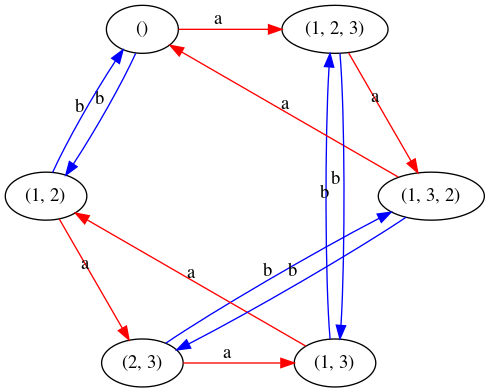

In [134]:
SymmetricGroup(3).CayleyGraph()

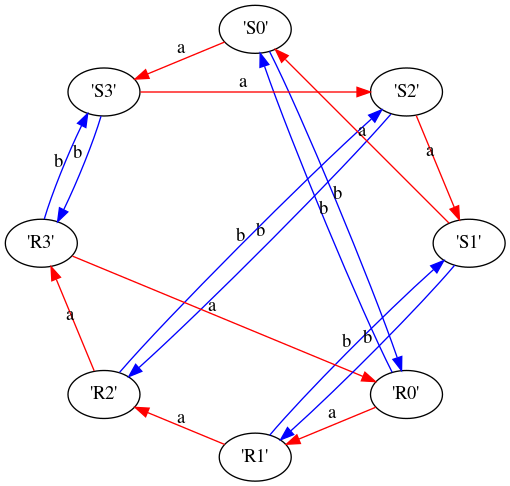

In [135]:
DihedralGroup(4).CayleyGraph()

In [136]:
from sympy.ntheory import *

In [137]:
primefactors(6)

[2, 3]

In [138]:
divisors(6)

[1, 2, 3, 6]

A,"{0, 1, 2, 3}"
B,{0}
C,"{0, 2}"


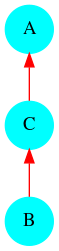

In [139]:
CyclicGroup(4).group_lattice()

A,"{(0, 1), (1, 2), (2, 1), (0, 0), (3, 1), (1, 1), (2, 0), (3, 0), (0, 2), (2, 2), (1, 0), (3, 2)}"
B,"{(0, 0)}"
C,"{(2, 0), (0, 0)}"
D,"{(0, 1), (0, 2), (0, 0)}"
E,"{(1, 0), (2, 0), (0, 0), (3, 0)}"
F,"{(0, 1), (0, 2), (2, 2), (2, 1), (0, 0), (2, 0)}"


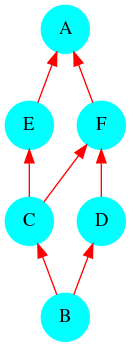

In [140]:
CyclicGroup(4).cartesian(CyclicGroup(3)).group_lattice()

A,"{(1, 3), (2, 3), (1, 3, 2), (1, 2, 3), (), (1, 2)}"
B,{()}
C,"{(2, 3), ()}"
D,"{(1, 3), ()}"
E,"{(), (1, 2)}"
F,"{(1, 2, 3), (), (1, 3, 2)}"


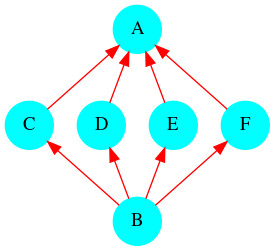

In [141]:
SymmetricGroup(3).group_lattice()

A,"{'S2', 'R0', 'R2', 'R1', 'R3', 'S1', 'S0', 'S3'}"
B,{'R0'}
C,"{'R0', 'S1'}"
D,"{'R0', 'S3'}"
E,"{'R0', 'R2'}"
F,"{'R0', 'S2'}"
G,"{'R0', 'S0'}"
H,"{'R0', 'R2', 'S2', 'S0'}"
I,"{'R0', 'R1', 'R2', 'R3'}"
J,"{'R0', 'R2', 'S1', 'S3'}"


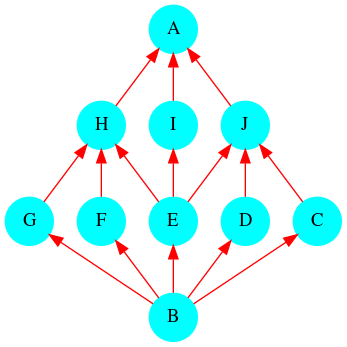

In [142]:
DihedralGroup(4).group_lattice()

# Roots of Unit Group

In [143]:

G = RootsOfUnitGroup(5)

In [144]:
list(G.Set)

[(1.0), (-0.809,-0.588j), (0.309,0.951j), (0.309,-0.951j), (-0.809,0.588j)]

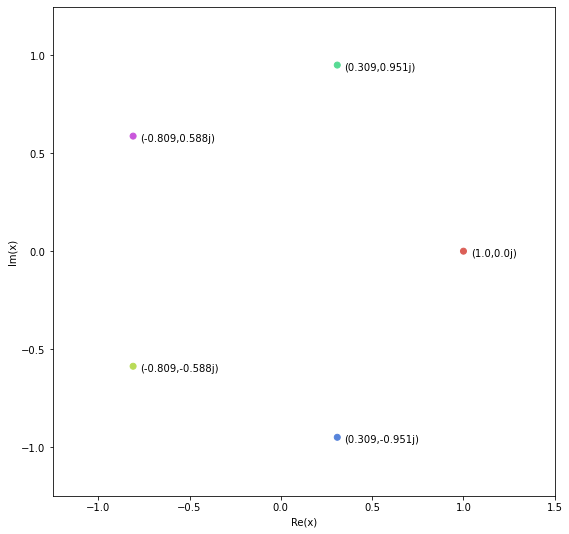

In [145]:
plot(G)

# Dihedral Group

In [146]:
D4 = Dihedral(4)
print(D4)

Rotaciones: 
(1.0, -0.0, 0.0, 1.0)
(0.0, -1.0, 1.0, 0.0)
(-1.0, -0.0, 0.0, -1.0)
(-0.0, 1.0, -1.0, -0.0)

Reflexiones 
(1.0, 0.0, 0.0, -1.0)
(0.0, 1.0, 1.0, -0.0)
(-1.0, 0.0, 0.0, 1.0)
(-0.0, -1.0, -1.0, 0.0)



In [147]:
D = DihedralGroup(3, rep='RS')
print(D)

Group with 6 elements: {'R0', 'R2', 'R1', 'S1', 'S0', 'S2'}


In [148]:
D2 = DihedralGroup(3, rep="matrix")
D3 = DihedralGroup(3, rep="permutations")


In [149]:
D.is_isomorphic(D2), D2.is_isomorphic(D3)

(True, True)

# Todd Coxeter Algorithm


En esta sección se verán diferentes ejemplos de ejecuciones del algoritmo de Todd Coxeter bajo el siguiente escenario:

Sea $G$ un grupo definido por una presentación  $G = \langle X \; | \; R \rangle $, donde  $X$  es el conjunto de generadores y  $R$ el conjunto de relatores. Sea $H = \langle h_1, h_2,...,h_r \rangle \leq G $, donde los generadores $ h_i$  son palabras en el alfabeto $ X^{\pm 1} $.

El procedimiento a seguir es el siguiente:

 - Leer los datos de entrada, ya sea introduciendo los datos a mano o haciendo uso del método readGroup(), en el que se le ha de indicar un fichero. 
 - Aplicar el Algoritmo de Todd Coxeter.
 - Obtener los generadores del grupo y, a partir de estos, obtener el resto de elementos para darle estructura de grupo.
 - Usar el método is\_isomorphic() para identificar cada grupo con grupos conocidos.


In [150]:
from ToddCoxeter import CosetTable, readGroup
from IPython.display import display, Image,HTML

In [151]:
gens = ['a']
rels = ['aaaa']

G = Group(gensG=gens, relsG=rels)
print(G)

Group with 4 elements: {(), (1, 2, 3, 4), (1, 4, 3, 2), (1, 3)(2, 4)}


$G=\langle a,b \mid a^2, b^2, ab=ba \rangle$ y $H=\{1\}$.
Internamente, el Algoritmo de Todd Coxeter trabaja con una tabla de clases laterales de $ G $ sobre $H$.
La clase principal se denomina CosetTable y en el constructor se definen las variables necesarias para aplicar el algoritmo a la presentación dada.

In [152]:
gen = ['a','b']
rels = ['aa','bb','abAB']
genH = []

G = CosetTable(gen,rels, genH)
G.CosetEnumeration()

Ahora bien, podemos mostrar la tabla de clases laterales y el grafo de Schreier asociado.
- Por teoría de grupos, el número de clases laterales coincide con el índice \\( [G:H]\\). 
- En nuestro programa, las clases laterales se representan por números \\( (1,2,3...) \\) .

In [153]:
T = G.coset_table()
print(T)

┌───┬───┬───┬───┬───┐
│ C │ a │ A │ b │ B │
├───┼───┼───┼───┼───┤
│ 1 │ 2 │ 2 │ 3 │ 3 │
├───┼───┼───┼───┼───┤
│ 2 │ 1 │ 1 │ 4 │ 4 │
├───┼───┼───┼───┼───┤
│ 3 │ 4 │ 4 │ 1 │ 1 │
├───┼───┼───┼───┼───┤
│ 4 │ 3 │ 3 │ 2 │ 2 │
└───┴───┴───┴───┴───┘


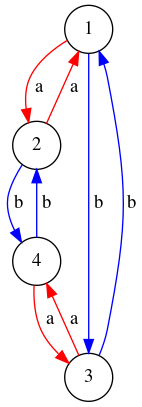

In [154]:
G.schreier_graph(notes=False)

Usando el \textit{Teorema de Cayley}, se puede representar el grupo dado por presentación como un grupo de permutaciones. Obtenemos los generadores del grupo y, a partir de ellos, obtenemos el resto de elementos.

In [155]:
def print_gens(gens):
    for i in range(len(gens)):
        print("g{} = {}".format(i, gens[i]))
        
generators = G.getGenerators()
print_gens(generators)

g0 = (1, 2)(3, 4)
g1 = (1, 3)(2, 4)


In [156]:
Gr = Group(elems=generators)
print(Gr)

Group with 4 elements: {(), (1, 2)(3, 4), (1, 4)(2, 3), (1, 3)(2, 4)}


Una vez dada estructura de grupo, el objetivo es identificar a que otro grupo es isomorfo. Podemos llamar a los diferentes métodos de la librería para conocer como se comportan los elementos.

In [157]:
Gr.table()K = KleinGroup()
Gr.is_isomorphic(K)

SyntaxError: invalid syntax (<ipython-input-157-0756b4443369>, line 1)

In [ ]:
K = KleinGroup()
Gr.is_isomorphic(K)

$G = \langle a,b \mid a^6 = b^{2} = c^{2} = 1, abc \rangle$ y  $H = \{ b\}$.

In [ ]:
file = "Groups/3gens.txt"
f = readGroup(file)
print(f)

In [ ]:
G = CosetTable(f)
G.CosetEnumeration()
print(G.coset_table())


In [ ]:
G.schreier_graph(notes=False)

Tanto la tabla de clases como el grafo de Schreier muestran 6 clases. Esto significa que $[G:H] = 6$.

In [ ]:
generators = G.getGenerators()
print_gens(generators)


In [ ]:
group = Group(elems=generators)
print(group)

In [ ]:
group.is_abelian()

El grupo no es abeliano, luego se tiene que cumplir una de las siguientes condiciones:
    \\[  G \cong A_4 = \{ a,b \mid a^3=b^3=(ab)^2=1 \} \\]
     \\[  G \cong D_6 = \{ a,b \mid a^6=b^2=1, ab=a^{-1}b \} \\]
    \\[  G \cong Q_3 = \{ a,b \mid a^{6}=1, a^n=b^2, ab=a^{-1}b \}\\]

In [ ]:
A = AlternatingGroup(4)
D = DihedralGroup(6)
Q = QuaternionGroupGeneralised(3)

print(group.is_isomorphic(A))
print(group.is_isomorphic(D))
print(group.is_isomorphic(Q))

In [ ]:
D12 = DihedralGroup(6)

D = D12.generate(['R1'])
C = SymmetricGroup(2)

print(D)
print(C)

In [ ]:
AutD = D.AutomorphismGroup()
Hom = C.AllHomomorphisms(AutD)

hom0 = GroupHomomorphism(C, AutD, lambda x:Hom[1](x))
SP0 = D.semidirect_product(C,hom0)


SP0.is_isomorphic(D12)

Como hemos visto, se trata del grupo diédrico $D_6$, de orden $12$. La presentación no es única.

# Otras presentaciones

$G = \langle a,b,c,d \mid a^2 = b^2 = c^2 = d^2 = 1, (ab)^3 = (bc)^3 = (cd)^3 = 1, (ac)^2 = (bd)^2 = (ad)^2 = 1\rangle$ 

$H=\{1\}$.

In [ ]:
file = "Groups/S5.txt"
f = readGroup(file)
f

In [ ]:
G = CosetTable(f)
G.CosetEnumeration()

In [ ]:
generators = G.getGenerators()
S = Group(elems = generators)
print(S)

In [ ]:
S.is_abelian()

In [ ]:
S5 = SymmetricGroup(5)

In [ ]:
S5.is_isomorphic(S)

$G = \langle a,b \mid a^5, b^3, (ab)^2 \rangle$ y $H=\{ 1 \}$.

In [ ]:
file = "Groups/A5.txt"
f = readGroup(file)
f

In [ ]:
G = CosetTable(f)
G.CosetEnumeration()

In [ ]:
generators = G.getGenerators()
print_gens(generators)

In [ ]:
S = Group(elems=generators)
S.order()

In [ ]:
A5 = AlternatingGroup(5)
A5.is_isomorphic(S)

Para acabar, consideraremos grupos que presentan orden alto pero que no se han estudiado en este proyecto. El objetivo es el de mostrar la potencia que tiene este método programado :

In [ ]:
file = "Groups/PSL2.txt"
f = readGroup(file)
f

In [ ]:
G = CosetTable(f)
G.CosetEnumeration()
generators = G.getGenerators()


In [ ]:
S = Group(elems=generators)
S.order()

$G = \langle a,b,c \mid b^2c^{-1}bc, a^2b^{-1}ab, cab^{-1}cabc
\rangle$ y $H=\langle a,b \rangle$.

In [ ]:
file = "Groups/G0.txt"
f = readGroup(file)
f

In [ ]:
C = CosetTable(f)
C.CosetEnumeration()
generators = C.getGenerators()

In [ ]:
S = Group(elems=generators)
S.order()

In [ ]:
S.is_abelian()

$G = \langle a,b,c \; | \;  a^{11} = b^2 = c^2 = 1, (ab)^3 = (ac)^3 = (bc)^{10} = 1, a^2(bc)^2a = (bc)^2  \; \rangle$

Es conocido como el grupo $M_{12}$, tiene orden 95040.

In [ ]:
file = "Groups/BIG.txt"
f = readGroup(file)
f

In [ ]:
C = CosetTable(f)
C.CosetEnumeration()

u = C.usedCosets()
f = C.finalCosets()


print("Clases usadas: {} \n Clases vivas: {}".format(u,f))